# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=9b3f38f690fed8d105287c750f88400d7706ed40ecd6e4300ba1186a1c0df86e
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.8 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.5 MB/s eta 0:00:00


In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
I want to analyze the evolution of product sales in selected countries of my choice in relation to the number of COVID-19 cases in those countries. The goal is to determine whether the number of cases could influence sales in a country.

What is the number of COVID cases in certain countries?

Does COVID affect purchasing power in these countries?

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "API" method from disease.sh source.

Dataset variables:

*   *country: Mean the country
*   *iso2 : Mean the code of the contry
*   *date : Mean the date
*   *cases: Mean the number of cases,
*   *deaths: Mean the number of deaths
*   *recovered": number of the of recovered

In [63]:
#FILL IN 1st data gathering and loading method
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sns
import zipfile

In [ ]:
#Create an HTTP GET request

# URLs
countries_url = "https://disease.sh/v3/covid-19/countries"
historical_url = "https://disease.sh/v3/covid-19/historical/{country}?lastdays=30"  # Fetch last 30 days' data

# Fetch the list of countries
try:
    countries_response = requests.get(countries_url)
    countries_response.raise_for_status()
    countries_data = countries_response.json()  # List of countries
except requests.RequestException as e:
    print(f"Error fetching countries: {e}")
    countries_data = []

# Initialize a list to store historical data
all_data = []

# Fetch historical data for each country
if countries_data:
    for country_info in countries_data:
        country_name = country_info.get("country", "Unknown")
        iso2 = country_info.get("countryInfo", {}).get("iso2", "NA")
        
        # Skip countries without valid ISO codes
        if iso2 == "NA":
            continue

        try:
            # Fetch historical data for the country
            historical_response = requests.get(historical_url.format(country=iso2))
            historical_response.raise_for_status()
            historical_data = historical_response.json()

            # Process the timeline data
            timeline = historical_data.get("timeline", {})
            for date, cases in timeline.get("cases", {}).items():
                all_data.append({
                    "country": country_name,
                    "iso2": iso2,
                    "date": date,
                    "cases": cases,
                    "deaths": timeline.get("deaths", {}).get(date, 0),
                    "recovered": timeline.get("recovered", {}).get(date, 0),
                })

        except requests.exceptions.HTTPError as e:
            if e.response.status_code == 404:
                print(f"Historical data not available for {country_name} ({iso2}). Skipping.")
            else:
                print(f"Error fetching historical data for {country_name} ({iso2}): {e}")

# Convert to a DataFrame
df = pd.DataFrame(all_data)

# Save to CSV
if len(df) > 500:
    csv_file = "covid19_historical_data.csv"
    df.to_csv(csv_file, index=False)
    print(f"Data saved to {csv_file}. Total rows: {len(df)}")
else:
    print(f"Insufficient data. Total rows: {len(df)}")

#with open('world_bank_data.zip', 'wb') as f:
  #f.write(response.content)

Historical data not available for Anguilla (AI). Skipping.
Historical data not available for Aruba (AW). Skipping.
Historical data not available for Bermuda (BM). Skipping.
Historical data not available for British Virgin Islands (VG). Skipping.
Historical data not available for Caribbean Netherlands (BQ). Skipping.
Historical data not available for Cayman Islands (KY). Skipping.
Historical data not available for Channel Islands (JE). Skipping.


In [64]:
#Show the dataset
covid_df = pd.read_csv('covid19_historical_data.csv')
covid_df.head()

,country,iso2,date,cases,deaths,recovered
0,Afghanistan,AF,2/8/23,208771,7896,0
1,Afghanistan,AF,2/9/23,208771,7896,0
2,Afghanistan,AF,2/10/23,208943,7896,0
3,Afghanistan,AF,2/11/23,208971,7896,0
4,Afghanistan,AF,2/12/23,208982,7896,0


#### Dataset 2

Type: CSV File

Method: The data was gathered using the "Doanloading the file" method from https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset source.

Dataset variables:

*   *InvoiceNo :	A unique identifier for each sales transaction (invoice).
*   *StockCode :	The code representing the product stock-keeping unit (SKU).
*   *Description :	A brief description of the product.
*   *Quantity :	The number of units of the product sold in the transaction.
*   *InvoiceDate :	The date and time when the sale was recorded.
*   *UnitPrice :	The price per unit of the product in the transaction currency.
*   *CustomerID :	A unique identifier for each customer.
*   *Country :	The customer's country.
*   *Discount :	The discount applied to the transaction, if any.
*   *PaymentMethod :	The method of payment used for the transaction (e.g., PayPal, Bank Transfer).
*   *ShippingCost :	The cost of shipping for the transaction.
*   *Category :	The category to which the product belongs (e.g., Electronics, Apparel).
*   *SalesChannel :	The channel through which the sale was made (e.g., Online, In-store).
*   *ReturnStatus :	Indicates whether the item was returned or not.
*   *ShipmentProvider :	The provider responsible for delivering the order (e.g., UPS, FedEx).
*   *WarehouseLocation :	The warehouse location from which the order was fulfilled.
*   *OrderPriority :	The priority level of the order (e.g., High, Medium, Low).

In [65]:
#FILL IN 2nd data gathering and loading method
#Download data manually 
#Show the dataset
sales_df= pd.read_csv('online_sales_dataset.csv')
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [ ]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Completeness

<Axes: >

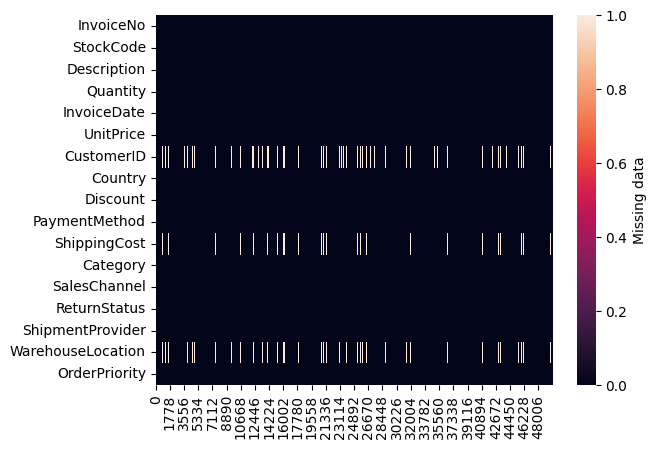

In [66]:
#Inspecting the sales_df dataframe visually
sns.heatmap(sales_df.isna().transpose(),cbar_kws={'label':'Missing data'})

In [67]:
#Inspecting the sales_df dataframe programmatically
print(sales_df.isnull().sum().sum())

10952


In [68]:
#Inspecting the covid_df dataframe programmatically
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    5730 non-null   object
 1   iso2       5730 non-null   object
 2   date       5730 non-null   object
 3   cases      5730 non-null   int64 
 4   deaths     5730 non-null   int64 
 5   recovered  5730 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 268.7+ KB


<Axes: >

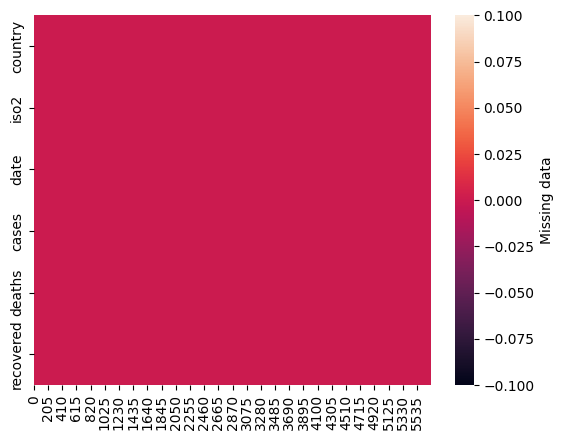

In [9]:
##Inspecting the covid_df dataframe visually
sns.heatmap(covid_df.isna().transpose(),cbar_kws={'label':'Missing data'})

Issue and justification: We can visually and programmatically observe that there are missing values in the sales_df file.

### Quality Issue 2: Accuracy

In [69]:
#Inspecting the sales_df dataframe visually
sales_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
2328,971310,SKU_1884,Notebook,2,2020-04-07 00:00,54.90,NaN,Norway,0.06,Bank Transfer,14.14,Furniture,In-store,Not Returned,FedEx,Berlin,Medium
43390,752241,SKU_1114,Desk Lamp,42,2024-12-12 22:00,44.40,86923.0,United Kingdom,0.33,Bank Transfer,20.40,Electronics,In-store,Not Returned,DHL,Amsterdam,Low
260,613153,SKU_1445,White Mug,35,2020-01-11 20:00,26.84,48451.0,Portugal,0.30,paypall,14.47,Stationery,In-store,Not Returned,Royal Mail,Berlin,Medium
16699,507878,SKU_1562,Backpack,34,2021-11-26 19:00,78.61,53532.0,Germany,0.46,Bank Transfer,21.70,Stationery,In-store,Not Returned,DHL,Berlin,High
44158,266190,SKU_1325,Blue Pen,38,2025-01-13 22:00,75.25,43082.0,United States,0.26,Bank Transfer,10.68,Furniture,Online,Not Returned,Royal Mail,London,High
493,805086,SKU_1960,USB Cable,42,2020-01-21 13:00,16.60,72141.0,Sweden,0.21,Bank Transfer,12.21,Furniture,Online,Not Returned,Royal Mail,Paris,Medium
13796,761386,SKU_1675,Wall Clock,16,2021-07-28 20:00,57.35,12556.0,France,0.40,paypall,9.27,Accessories,Online,Not Returned,FedEx,London,Low
12455,899717,SKU_1814,Headphones,5,2021-06-02 23:00,68.50,44724.0,Italy,0.28,Bank Transfer,24.06,Apparel,In-store,Not Returned,FedEx,London,Medium
4143,745194,SKU_1773,Wireless Mouse,41,2020-06-21 15:00,43.17,27539.0,Norway,0.40,paypall,18.05,Furniture,Online,Not Returned,UPS,London,High
6143,217797,SKU_1247,Notebook,20,2020-09-12 23:00,93.13,NaN,Belgium,0.20,Credit Card,10.74,Furniture,Online,Not Returned,FedEx,Paris,Medium


In [70]:
#Inspecting the sales_df dataframe visually
sales_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [71]:
#Inspecting the covid_df dataframe programmatically
covid_df.head(20)

,country,iso2,date,cases,deaths,recovered
0,Afghanistan,AF,2/8/23,208771,7896,0
1,Afghanistan,AF,2/9/23,208771,7896,0
2,Afghanistan,AF,2/10/23,208943,7896,0
3,Afghanistan,AF,2/11/23,208971,7896,0
4,Afghanistan,AF,2/12/23,208982,7896,0
5,Afghanistan,AF,2/13/23,209011,7896,0
6,Afghanistan,AF,2/14/23,209036,7896,0
7,Afghanistan,AF,2/15/23,209056,7896,0
8,Afghanistan,AF,2/16/23,209072,7896,0
9,Afghanistan,AF,2/17/23,209083,7896,0


In [72]:
#Inspecting the covid_df dataframe programmatically
covid_df.info()
covid_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    5730 non-null   object
 1   iso2       5730 non-null   object
 2   date       5730 non-null   object
 3   cases      5730 non-null   int64 
 4   deaths     5730 non-null   int64 
 5   recovered  5730 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 268.7+ KB


,cases,deaths,recovered
count,5.730000e+03,5.730000e+03,5730.0
mean,3.522313e+06,3.578682e+04,0.0
std,1.029150e+07,1.128598e+05,0.0
min,1.000000e+00,0.000000e+00,0.0
25%,4.284600e+04,4.090000e+02,0.0
50%,3.428170e+05,3.500000e+03,0.0
75%,2.037713e+06,1.984300e+04,0.0
max,1.038027e+08,1.123836e+06,0.0


Issue and justification: We can observe the presence of negative values in the "quantity" column of the sales_df DataFrame. For more accuracy in the analysis, we will focus on positive quantities.

### Tidiness Issue 1: Multiple Observational Units in a Single Table

In [74]:
#Inspecting the sales_df dataframe visually
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [75]:
#Inspecting the sales_df dataframe programmatically
sales_df.value_counts()

InvoiceNo  StockCode  Description   Quantity  InvoiceDate       UnitPrice  CustomerID  Country      Discount  PaymentMethod  ShippingCost  Category     SalesChannel  ReturnStatus  ShipmentProvider  WarehouseLocation  OrderPriority
100005     SKU_1312   Notebook      45        2022-01-12 19:00  89.78      88722.0     Norway       0.16      Credit Card    26.38         Electronics  Online        Not Returned  UPS               Paris              Low              1
700898     SKU_1846   USB Cable     18        2023-05-11 08:00  94.75      53691.0     France       0.36      Bank Transfer  7.45          Stationery   Online        Not Returned  Royal Mail        Paris              Medium           1
700803     SKU_1434   Notebook      22        2021-07-27 10:00  15.84      21156.0     Belgium      0.26      Credit Card    24.80         Accessories  Online        Not Returned  Royal Mail        London             Low              1
700806     SKU_1309   USB Cable     24        2024-02-28 21:0

In [76]:
#Inspecting the covid_df dataframe visually
covid_df.head(10)

,country,iso2,date,cases,deaths,recovered
0,Afghanistan,AF,2/8/23,208771,7896,0
1,Afghanistan,AF,2/9/23,208771,7896,0
2,Afghanistan,AF,2/10/23,208943,7896,0
3,Afghanistan,AF,2/11/23,208971,7896,0
4,Afghanistan,AF,2/12/23,208982,7896,0
5,Afghanistan,AF,2/13/23,209011,7896,0
6,Afghanistan,AF,2/14/23,209036,7896,0
7,Afghanistan,AF,2/15/23,209056,7896,0
8,Afghanistan,AF,2/16/23,209072,7896,0
9,Afghanistan,AF,2/17/23,209083,7896,0


In [77]:
#Inspecting the covid_df dataframe programmatically
covid_df.value_counts()

country      iso2  date     cases     deaths  recovered
Afghanistan  AF    2/10/23  208943    7896    0            1
Oman         OM    3/5/23   399449    4628    0            1
Pakistan     PK    2/25/23  1576795   30641   0            1
                   2/24/23  1576795   30641   0            1
                   2/23/23  1576795   30641   0            1
                                                          ..
Germany      DE    2/28/23  38168908  168086  0            1
                   2/27/23  38144033  167951  0            1
                   2/26/23  38111063  167812  0            1
                   2/25/23  38111063  167812  0            1
Zimbabwe     ZW    3/9/23   264276    5671    0            1
Name: count, Length: 5730, dtype: int64

Issue and justification: According to the principles of tidy data, each type of observational unit should form a separate table, Here a single table contain multiple observational units in a covid_df dataframe

### Tidiness Issue 2: Columns as Values

In [78]:
#Inspecting the sales_df dataframe visually
sales_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [79]:
#Inspecting the sales_df dataframe programmatically
sales_df.info()
sales_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

(49782, 17)

In [80]:
#Inspecting the covid_df dataframe visually
#Each row is a single observation second dataset
covid_df.head(10)

,country,iso2,date,cases,deaths,recovered
0,Afghanistan,AF,2/8/23,208771,7896,0
1,Afghanistan,AF,2/9/23,208771,7896,0
2,Afghanistan,AF,2/10/23,208943,7896,0
3,Afghanistan,AF,2/11/23,208971,7896,0
4,Afghanistan,AF,2/12/23,208982,7896,0
5,Afghanistan,AF,2/13/23,209011,7896,0
6,Afghanistan,AF,2/14/23,209036,7896,0
7,Afghanistan,AF,2/15/23,209056,7896,0
8,Afghanistan,AF,2/16/23,209072,7896,0
9,Afghanistan,AF,2/17/23,209083,7896,0


In [81]:
#Inspecting the covid_df dataframe Progammaticaly
#Each row is a single observation second dataset
covid_df.info()
covid_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    5730 non-null   object
 1   iso2       5730 non-null   object
 2   date       5730 non-null   object
 3   cases      5730 non-null   int64 
 4   deaths     5730 non-null   int64 
 5   recovered  5730 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 268.7+ KB


(5730, 6)

Issue and justification: datasets covid_df has a columns that are values rather than variable names. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [82]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
sales_df_clean = sales_df.copy()
sales_df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [83]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
covid_df_clean = covid_df.copy()
covid_df_clean.head()

,country,iso2,date,cases,deaths,recovered
0,Afghanistan,AF,2/8/23,208771,7896,0
1,Afghanistan,AF,2/9/23,208771,7896,0
2,Afghanistan,AF,2/10/23,208943,7896,0
3,Afghanistan,AF,2/11/23,208971,7896,0
4,Afghanistan,AF,2/12/23,208982,7896,0


### **Quality Issue 1: Completeness

In [84]:
# FILL IN - Apply the cleaning strategy
sales_df_clean = sales_df_clean.dropna()
assert sales_df_clean.isnull().sum().sum() == 0

<Axes: >

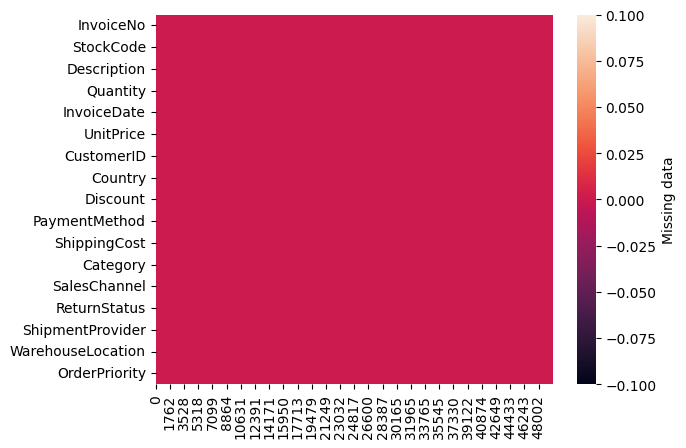

In [86]:
# FILL IN - Validate the cleaning was successful
sns.heatmap(sales_df_clean.isna().transpose(),cbar_kws={'label':'Missing data'})

Justification: The remaining missing values have been removed. I choose the `dropna` methode to efficiently remove null and check with the `assert`methode.We can also see it in visual plot

### **Quality Issue 2: Accuracy

In [87]:
#FILL IN - Apply the cleaning strategy
sales_df_clean = sales_df_clean.loc[(sales_df_clean['Quantity'])>0]

In [88]:
#Validate the cleaning was successful
sales_df_clean.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,44804.000000,44804.000000,44804.000000,44804.000000,44804.000000,44804.000000
mean,549849.692282,24.896973,50.622735,55032.871775,0.250474,17.484206
std,260681.031778,14.150006,28.596901,25913.660157,0.144349,7.218483
min,100005.000000,1.000000,1.000000,10001.000000,0.000000,5.000000
25%,323744.750000,13.000000,25.880000,32750.750000,0.130000,11.210000
50%,551099.500000,25.000000,50.490000,55165.000000,0.250000,17.470000
75%,775251.750000,37.000000,75.400000,77306.250000,0.380000,23.710000
max,999997.000000,49.000000,100.000000,99998.000000,0.500000,30.000000


Justification: The negative values have been removed. I choose the `loc` methode to select the column cible and check with the methode `describe`

### **Tidiness Issue 1: Multiple Observational Units in a Single Table

In [89]:
#Split the data into two separate tables
covidT1_df_clean = covid_df_clean[['country','date','deaths','recovered']]
covid_df_clean=covid_df_clean[['country','iso2','date','cases','recovered']]

In [90]:
#FILL IN - Validate the cleaning was successful
# show the both table
covid_df_clean.head()

,country,iso2,date,cases,recovered
0,Afghanistan,AF,2/8/23,208771,0
1,Afghanistan,AF,2/9/23,208771,0
2,Afghanistan,AF,2/10/23,208943,0
3,Afghanistan,AF,2/11/23,208971,0
4,Afghanistan,AF,2/12/23,208982,0


In [91]:
#FILL IN - Validate the cleaning was successful
# show the both table
covidT1_df_clean.head()

,country,date,deaths,recovered
0,Afghanistan,2/8/23,7896,0
1,Afghanistan,2/9/23,7896,0
2,Afghanistan,2/10/23,7896,0
3,Afghanistan,2/11/23,7896,0
4,Afghanistan,2/12/23,7896,0


In [92]:
#FILL IN - Apply the cleaning strategy
sales_df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


In [93]:
#Reset the index
sales_df_clean = sales_df_clean.reset_index(drop=True)

In [94]:
#FILL IN - Validate the cleaning was successful
sales_df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


Justification: the table has been split into two separate tables, one for covidT1_df_clean and one for covid_df_clean. I assigned the columns with the observations related to each table by proceeding with assignments.

### **Tidiness Issue 2: Columns as Values

In [95]:
#FILL IN - show the covidT1_df_clean dataframe
covidT1_df_clean.head()

,country,date,deaths,recovered
0,Afghanistan,2/8/23,7896,0
1,Afghanistan,2/9/23,7896,0
2,Afghanistan,2/10/23,7896,0
3,Afghanistan,2/11/23,7896,0
4,Afghanistan,2/12/23,7896,0


In [96]:
# Reshape the data
covidT1_df_clean=pd.melt(covidT1_df_clean,id_vars=['country','date'],var_name='deaths')

In [97]:
#FILL IN - Validate the cleaning was successful
covidT1_df_clean.head()

,country,date,deaths,value
0,Afghanistan,2/8/23,deaths,7896
1,Afghanistan,2/9/23,deaths,7896
2,Afghanistan,2/10/23,deaths,7896
3,Afghanistan,2/11/23,deaths,7896
4,Afghanistan,2/12/23,deaths,7896


In [98]:
#FILL IN - Validate the cleaning was successful
sales_df_clean.columns = sales_df_clean.columns.str.lower()
sales_df_clean.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,discount,paymentmethod,shippingcost,category,saleschannel,returnstatus,shipmentprovider,warehouselocation,orderpriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


Justification: We constate that each variable forms a column in the dataset covidT1_df_clean. To correct this, i use the melt() function in pandas to reshape the data.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [99]:
#FILL IN - Remove unnecessary variables and combine datasets
merge_df=pd.merge(sales_df_clean,covid_df_clean,on=['country'], how='left')
merge_df = merge_df.dropna()
merge_df = merge_df.drop(columns=['returnstatus', 'recovered','iso2'])
merge_df.sample(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,discount,paymentmethod,shippingcost,category,saleschannel,shipmentprovider,warehouselocation,orderpriority,date,cases
566599,183035,SKU_1814,Wireless Mouse,40,2022-11-05 04:00,25.11,84612.0,Netherlands,0.11,paypall,16.14,Accessories,Online,DHL,Paris,Medium,2/13/23,8699058.0
705139,898001,SKU_1976,Wall Clock,42,2023-07-20 11:00,30.53,31040.0,Belgium,0.02,Credit Card,27.06,Accessories,Online,Royal Mail,London,High,2/25/23,4717655.0
1099703,377158,SKU_1811,Blue Pen,3,2025-07-13 03:00,62.92,14627.0,Norway,0.31,paypall,20.12,Apparel,Online,DHL,Amsterdam,Low,3/5/23,1479259.0
71365,338340,SKU_1579,Blue Pen,46,2020-05-08 08:00,84.26,24340.0,Sweden,0.42,Credit Card,21.24,Furniture,In-store,Royal Mail,Paris,Low,2/17/23,2697159.0
718550,874821,SKU_1314,Blue Pen,5,2023-08-14 11:00,77.25,62611.0,France,0.08,Bank Transfer,21.03,Furniture,In-store,UPS,London,High,3/2/23,39835896.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [100]:
#FILL IN - saving data
sales_df_clean.to_csv('online_sales_dataset_cleaned.csv',index=False)
covid_df_clean.to_csv('covid19_hist_data_cleaned_cases.csv',index=False)
covidT1_df_clean.to_csv('covid19_hist_data_cleaned_deaths.csv',index=False)
merge_df.to_csv('covid_sales_influence_final.csv',index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* What is the number of COVID cases in certain countries?

In [101]:
#Visual 1 - FILL IN
covid_resume = merge_df[merge_df['country'].isin(['Australia','Netherlands','Norway'])]
covid_resume= covid_resume.groupby('country').cases.mean()
covid_resume

country
Australia      1.135712e+07
Netherlands    8.705091e+06
Norway         1.478809e+06
Name: cases, dtype: float64

<Axes: title={'center': 'Number of cases from somes country'}, xlabel='country', ylabel='Number of cases'>

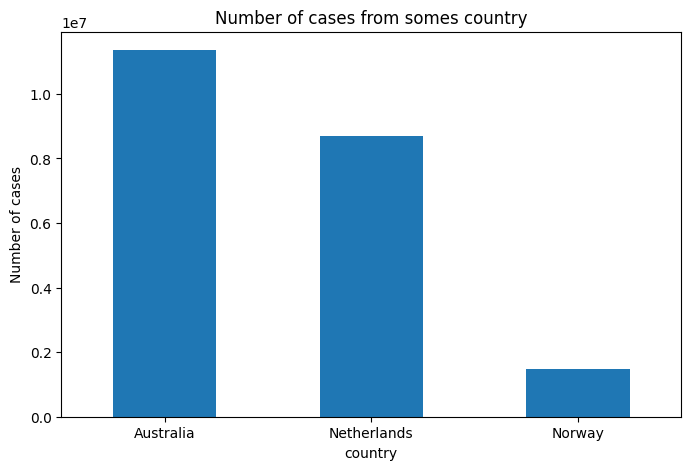

In [59]:
covid_resume.plot(
kind="bar",
title="Number of cases from somes country",
xlabel="country",
ylabel="Number of cases",
legend=False,
rot=0,
figsize=(8, 5)
)

*Answer to research question: It can be observed that Australia had more cases than the other two countries.

In [102]:
#Visual 2 - FILL IN
sales_resume = merge_df[merge_df['country'].isin(['Australia','Netherlands','Norway'])]
sales_resume= sales_resume.groupby('country').quantity.mean()
sales_resume

country
Australia      24.634397
Netherlands    24.698908
Norway         24.829412
Name: quantity, dtype: float64

<Axes: title={'center': 'Number of cases from somes contry'}, xlabel='country', ylabel='Number of cases'>

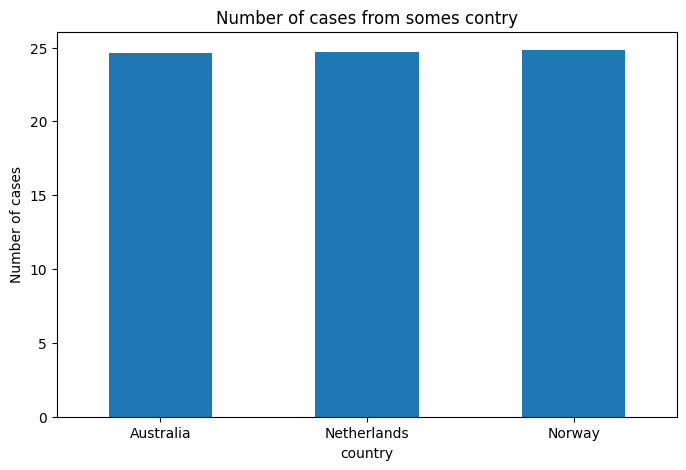

In [62]:
sales_resume.plot(
kind="bar",
title="Number of cases from somes contry",
xlabel="country",
ylabel="Number of cases",
legend=False,
rot=0,
figsize=(8, 5)
)

*Answer to research question:* The countries have approximately the same number of items sold during the crisis.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I would focus on processing, relevance, and consistency of the dates and period between sales and covid cases